Link al repositorio de GitHub: https://github.com/alejandrojimenezvalero/eolic_energy_prediction_sk_learn

# Primera práctica: modelos de regresión para predicción de la energía eólica

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargamos el fichero csv
wind_ava = pd.read_csv('./wind_ava.csv.gz', compression='gzip')

# Primera aproximación al EDA

In [3]:
# Hacemos índice la columna datetime
wind_ava.set_index('datetime', inplace=True)

In [4]:
# Visualizamos las primeras 5 ocurrencias de los datos para entender los datos con los que estamos trabajando
wind_ava.head()

,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,p54.162.9,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,2.505940e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,2.508339e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,2.504882e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,2.505904e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,2.501015e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986


In [5]:
# Veamos la forma del conjunto de datos
wind_ava.shape # devuelbe una tupla (filas,columnas) del dataset

(4748, 551)

Como se puede ver, en la tabla se muestran los valores de las 22 variables meterolóigas para las 25 ubicaciones de la cuadrícula (5X5) lo que resulta en 22*25 = 550 más la variable fecha y la variable energía nos dan el total de 552 columnas del dataset.
No obstante,  a nosotros solo nos interesan las variables meteorológicas de la localización de Sotavento, así como la variable energía

In [6]:
# Hay que eliminar todas las variables meteorológicas que no correspondan a la localización de Sotavento (13)
for c in wind_ava:
	if not c.endswith('.13') and c != 'energy':
		wind_ava.drop(c, axis=1, inplace=True)

In [7]:
wind_ava.columns

Index(['energy', 'p54.162.13', 'p55.162.13', 'cape.13', 'p59.162.13',
       'lai_lv.13', 'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13', 'stl1.13',
       'u10.13', 'v10.13', 't2m.13', 'stl2.13', 'stl3.13', 'iews.13',
       'inss.13', 'stl4.13', 'fsr.13', 'flsr.13', 'u100.13', 'v100.13'],
      dtype='object')

Ahora, que tenemos las features para la localización objetivo, debemos de observar analíticamente los datos

In [8]:
# Número de instancias
print("Número de instancias:",  wind_ava.shape[0])
# Número de features
print("Número de características (sin tener en cuenta la variable explicada):",  wind_ava.shape[1]-1) # La columna de la variable a predecir no se puede contar ni la columna de datetime

Número de instancias: 4748
Número de características (sin tener en cuenta la variable explicada): 22


In [9]:
#Información a cerca de las características
wind_ava.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4748 entries, 2005-01-02 18:00:00 to 2009-12-31 18:00:00
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   energy      4748 non-null   float64
 1   p54.162.13  4748 non-null   float64
 2   p55.162.13  4748 non-null   float64
 3   cape.13     4748 non-null   float64
 4   p59.162.13  4748 non-null   float64
 5   lai_lv.13   4748 non-null   float64
 6   lai_hv.13   4748 non-null   float64
 7   u10n.13     4748 non-null   float64
 8   v10n.13     4748 non-null   float64
 9   sp.13       4748 non-null   float64
 10  stl1.13     4748 non-null   float64
 11  u10.13      4748 non-null   float64
 12  v10.13      4748 non-null   float64
 13  t2m.13      4748 non-null   float64
 14  stl2.13     4748 non-null   float64
 15  stl3.13     4748 non-null   float64
 16  iews.13     4748 non-null   float64
 17  inss.13     4748 non-null   float64
 18  stl4.13     4748 non-null   float64
 19 

In [10]:
# Comprobar efectivamente los valores nulos por columna en el dataset
wind_ava.isnull().sum()

energy        0
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64

Como pueden observarse, los tipos de las variables son *float64*, lo cual nos indica que todas las variables son de tipo numérico, incluida la variable respuesta. Asimismo, la información del dataset especifica que no hay valores faltantes para ninguna variable de entrada del modelo, así como para la variable respuesta.

Para determinar si el problema es de regresión o clasificación, debemos analizar la naturaleza de la variable objetivo que estás tratando de predecir. En este caso, la variable a predecir es la energía.

**Regresión**: Si la variable a predecir (energía en este caso) es una cantidad continua o un valor numérico, entonces el problema es de regresión. En la regresión, el objetivo es predecir un valor numérico.

**Clasificación**: Si la variable a predecir es discreta y representa clases o categorías, entonces el problema es de clasificación. En la clasificación, el objetivo es predecir la clase a la que pertenece una instancia, por ejemplo, predecir si un correo electrónico es spam o no spam, predecir el tipo de flor basado en sus características, etc.

Dado que la variable objetivo es la energía, y esta es una cantidad continua (como la potencia en vatios), entonces el problema es de ***regresión***.

In [11]:
# Para ver si hay columnas constantes en el dataset, es decir columnas con todos los valores iguales
print("Columnas constantes:", wind_ava.columns[wind_ava.nunique() == 1])

Columnas constantes: Index([], dtype='object')


Podemos ver que no hay columnas constantes en nuestro conjunto de datos.

Asimismo, no existen columnas que no sean importantes para el problema en el conjunto de datos, puesto que todas las variables de entrada deberán ser consideradas a la hora de realizar la predicción, por lo que no eliminamos ninguna columna debido a que todas son importantes

# EDA más avanzado

In [12]:
wind_ava.head()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


Viendo los datos, es fácil darse cuenta que algunas columnas están en notación científica y otras no, pero esto es una cuestión de visualización de los datos de pandas. Además, los datos toman decimales y a simple vista parece que todos guardan seis decimales, pero no cuesta nada hacer un ejercicio de ***estandarización*** del conjunto de datos para asegurarnos que todos los datos tengan los mismo decimales. Asumimos que la precisión para estos modelos será muy importante por lo que dejamos los 6 decimales

In [13]:
wind_ava.round(6)

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,95460.434452,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,855.00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,95663.765406,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,117.06,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,95653.110509,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


In [14]:
# Para ver una descripción numérica de los datos
wind_ava.describe()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,...,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,...,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,...,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,...,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,...,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,...,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,...,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395
max,2792.550000,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,...,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033


El método *.describe()* nos permite ver medidas de estadísitca descriptiva del conjunto de los datos para poder estudiar cómo es la distribución de los datos, si existen outliers o no que causen ruido en los datos, entre otras muchas caracterísitcas.

Podemos ver un ejemplo de detección de outliers para la variable de respuesta *energy*.
Primero, mostremos un histograma para ver en torno a qué valores se encuentra típicamente el valor de la energía.

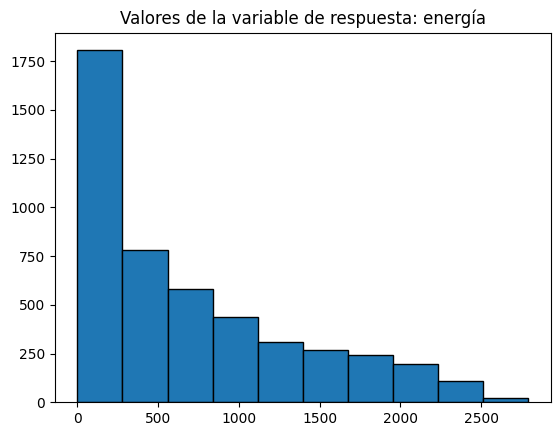

In [15]:
plt.title('Valores de la variable de respuesta: energía')
plt.hist(wind_ava['energy'], edgecolor = 'black', linewidth=1)
plt.show()

Podemos ver que la distribución de los valores tiene una cola a la derecha. A partir del valor 2500 a penas hay ocurrencias.

De todas fromas para la detección de outliers es más preciso realizar un diagrama de caja y bigotes

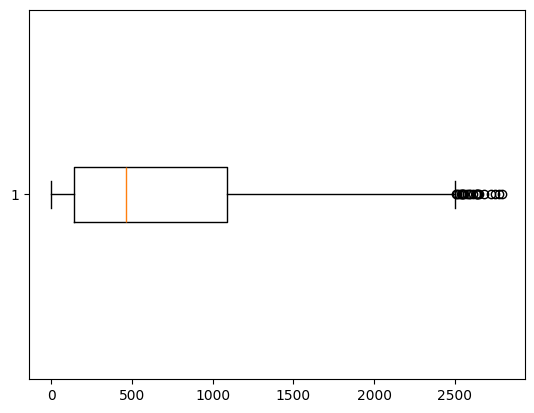

In [16]:
plt.boxplot(wind_ava['energy'], vert =False)
plt.show()

El cálculo de los outliers es sencillo estadísitcamente hablando, primero debemos calcular los cuartiles 1 y 3, Q1 y Q3:


In [17]:
Q1 = wind_ava['energy'].quantile(0.25)
Q3 = wind_ava['energy'].quantile(0.75)

Teniendo esto podemos calcular el IQR o Rango Intercuartílico, que es la diferencia de Q3 y Q1. Y con esto, los outliers serían matemáticamente:
- Los valores por encima de: Q3 + 1.5*IQR
- Los valores por debajo de: Q1 - 1.5*IQR


In [18]:
IQR = Q3-Q1
inf_limit = Q1 - 1.5 * IQR
sup_limit = Q3 + 1.5 * IQR
outliers = wind_ava[(wind_ava['energy'] < inf_limit) | (wind_ava['energy'] > sup_limit)]
print("Los outliers de la variable energía son:")
print(outliers['energy'])
print('Total de valores atípicos: ', outliers['energy'].count())

Los outliers de la variable energía son:
datetime
2005-03-27 00:00:00    2574.03
2005-04-17 18:00:00    2610.74
2005-11-02 18:00:00    2513.07
2005-11-13 12:00:00    2628.17
2005-11-13 18:00:00    2556.86
2005-11-23 00:00:00    2596.75
2005-12-04 06:00:00    2723.12
2005-12-04 12:00:00    2646.15
2005-12-15 06:00:00    2774.89
2006-02-15 12:00:00    2508.97
2006-03-30 06:00:00    2552.41
2007-06-14 18:00:00    2547.09
2007-11-27 06:00:00    2526.31
2009-05-28 00:00:00    2536.88
2009-06-21 00:00:00    2586.51
2009-11-08 00:00:00    2639.04
2009-11-21 06:00:00    2547.25
2009-11-28 18:00:00    2745.86
2009-12-02 12:00:00    2640.18
2009-12-13 00:00:00    2792.55
2009-12-13 12:00:00    2680.34
2009-12-21 18:00:00    2652.85
Name: energy, dtype: float64
Total de valores atípicos:  22


Por tanto estos datos podrían ser considerados estadísitcamente outliers, y deberíamos no tenerlos en cuenta en el dataset puesto que pueden añadir ruido a los datos.
Para ello, nos quedamos con las filas que no contienen valores atípicos para la variable energía:

In [19]:
cleaned_wind_ava = wind_ava[(wind_ava['energy'] >= inf_limit) & (wind_ava['energy'] <= sup_limit)]

In [20]:
cleaned_wind_ava.describe()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4726.000000,4.726000e+03,4726.000000,4726.000000,4.726000e+03,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,...,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000
mean,684.169149,2.489626e+06,16.016835,31.201523,1.699394e+06,2.816193,2.576574,0.380019,0.115390,97822.284507,...,285.701337,286.678183,286.674667,0.073137,0.049094,286.666648,0.413669,-5.908529,0.438561,0.321166
std,653.945329,4.479339e+04,6.555359,121.974122,1.460060e+06,0.397435,0.116448,3.086158,3.005460,712.248503,...,6.172166,5.552623,4.588552,0.364142,0.375981,3.555191,0.007599,0.094358,4.819013,4.650616
min,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.240219,93770.364813,...,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-11.621539
25%,143.515000,2.458779e+06,11.205974,0.000000,6.555602e+05,2.425996,2.461678,-1.947144,-2.050746,97461.493901,...,281.458065,282.297737,282.686533,-0.126591,-0.148342,283.404679,0.410027,-5.977558,-3.825475,-3.254947
50%,461.060000,2.490702e+06,15.547168,1.004148,1.236491e+06,2.762401,2.561325,0.044568,-0.193244,97862.289273,...,285.413523,286.232864,286.223583,0.010427,-0.003637,286.573790,0.410914,-5.947290,0.274291,-0.391661
75%,1079.207500,2.525359e+06,20.224918,14.162275,2.285809e+06,3.206503,2.688548,2.626161,2.000469,98252.334616,...,289.756760,291.361743,291.002737,0.230436,0.170826,290.025430,0.417003,-5.858953,4.167682,3.602047
max,2502.350000,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,...,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033


Este tratamiento de valores atípicos ha contribuido a reducir la desviación estándar de la variable respuesta en 15 puntos.

Otro método que se lleva a cabo cuando se hace EDA es el análisis de relación entre variables. Podemos empezar visualizando la matriz de correlación entre variables:

In [21]:
# Calcular la matriz de correlación
correlation_matrix = cleaned_wind_ava.corr()

              energy  p54.162.13  p55.162.13   cape.13  p59.162.13  lai_lv.13  \
energy      1.000000   -0.235278    0.004603 -0.048216    0.443949  -0.208783   
p54.162.13 -0.235278    1.000000    0.360303  0.078018   -0.400871   0.638894   
p55.162.13  0.004603    0.360303    1.000000  0.275657    0.066527   0.422795   
cape.13    -0.048216    0.078018    0.275657  1.000000    0.002957   0.123900   
p59.162.13  0.443949   -0.400871    0.066527  0.002957    1.000000  -0.270455   
lai_lv.13  -0.208783    0.638894    0.422795  0.123900   -0.270455   1.000000   
lai_hv.13  -0.210599    0.654610    0.436676  0.128836   -0.272979   0.998611   
u10n.13     0.242287   -0.290186    0.285907  0.029471    0.547250  -0.088903   
v10n.13     0.313555   -0.269500    0.237272  0.003114    0.348160  -0.239068   
sp.13      -0.188121    0.492702   -0.266135 -0.145174   -0.303330  -0.064667   
stl1.13    -0.194440    0.723617    0.565051  0.233832   -0.245420   0.773610   
u10.13      0.245283   -0.28

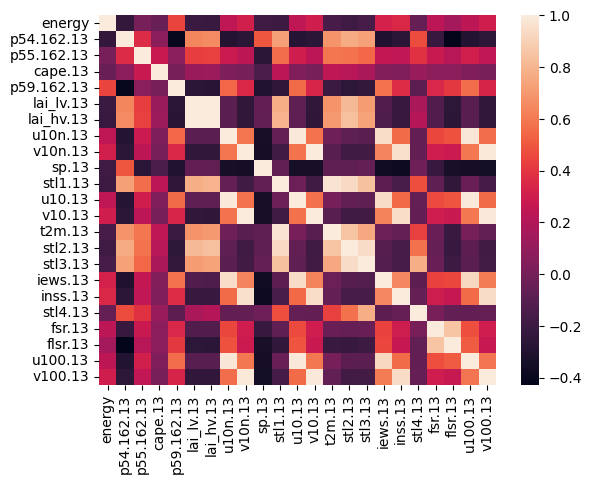

In [22]:
 # Se puede utilizar la librería seabron para visualizar esto en un heatmap
sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=False)
print(correlation_matrix)

Debemos estudiar por pares las relaciones entre las variables de manera aislada. Existen una gran cantidad de combinaciones.

Es importante tener en cuenta, que este será un problema de regresión. En una regresión es importante para la potencia de la predicción, que las variables independientes no estén o estén mínimamente correladas entre sí (no multicolinealidad) , porque entonces, cambios en una variable independiente producen cambios en otras y estos cambios sobre la variable respuesta, y entonces ya es difícil medir los efectos individuales de cada variable sobre la variable de respuesta. En principio, las variables independientes se determinan de manera que no estén correladas entre sí. Un ejemplo se muestra en el siguiente plot entre dos variables predictoras de la regresión, en el que se puede apreciar que no existe correlación aparente.

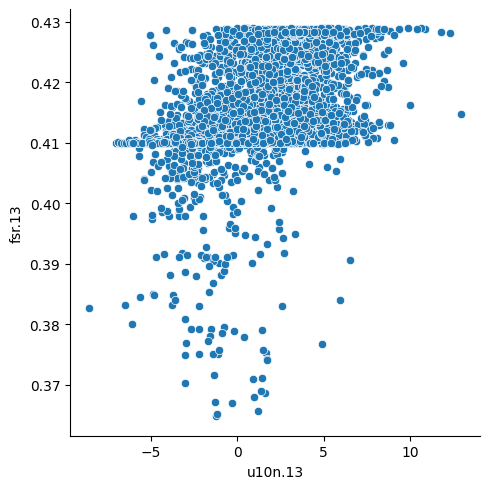

In [23]:
sns.relplot(x= 'u10n.13', y= 'fsr.13', data=cleaned_wind_ava)

In [24]:
import os
# Guardamos el fichero con el conjunto de dato tras la aplicación del EDA
file_path = os.path.join( os.getcwd(), 'cleaned_wind_ava.csv')
# Guardar el DataFrame como un archivo CSV en la ruta especificada
cleaned_wind_ava.to_csv(file_path, index=True)

# Decisión Evaluación del modelo

En esta sección se van a definir los procedimientos a seguir para abordar el problema de regresión y evaluar el rendimiento del modelo tanto en la evaluación outer (rendimiento del modelo) como en la evaluación inner (para comparar diferentes alternativas y ajustar hiperparámetros)

## Evaluación outer

En esta sección se discute cómo se llevará a cabo la evaluación del modelo final, junto con la definición de las métricas para la medición del rendimiento.

Se van a dividir los datos en conjuntos de entrenamiento y prueba. Como el conjunto de datos es una serie temporal que contiene información de los años 2005, 2006, 2007, 2008 y 2009, se ha decidido tomar los datos de los 4 primeros años para entrenamiento y el último año para test. Este conjunto de test outer será el que se utilice para evaluar el rendimiento del modelo final.

Posteriormente, se entranarán una serie de modelos para hacer una evaluación inner de su rendimiento, haciendo validación cruzada sobre el conjunto de entrenamiento de la partición outer.

Para evaluar el rendimiento, al ser un problema de regresión, es necesario escoger las métricas adecuadas al tipo de problema, como podrían ser:

- Coeficiente de Determinación (R²): proporciona una medida de qué tan bien se ajustan los valores predichos a los valores reales. Es una medida de la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Cuanto más cercano sea R² a 1, mejor es el ajuste del modelo a los datos.
Puede compararse con el rendimiento de un modelo nulo que simplemente predice la media de la variable dependiente en todos los casos. Un valor de R² cercano a 1 indica que el modelo es mucho mejor que este modelo nulo.

- Error Cuadrático Medio (MSE):vcalcula el promedio de los errores al cuadrado entre los valores reales y los valores predichos. Es una medida de la calidad general del modelo. Cuanto menor sea el valor de MSE, mejor será el ajuste del modelo a los datos.
MSE penaliza los errores grandes de manera significativa debido a su naturaleza cuadrática. Esto significa que los errores grandes tendrán un impacto más significativo en el MSE, lo que puede ser importante dependiendo del contexto del problema.
Como es una medida de la pérdida del modelo, cuanto menor sea el MSE, mejor será el rendimiento del modelo. Esto hace que el MSE sea útil para comparar diferentes modelos y seleccionar el mejor entre ellos.



## Evaluación inner

En esta sección se discutirá cómo se realizará la evaluación inner, tanto para el ajuste de hiperparámetros, como la comparación de alternativas, las cuales en esta práctica se corresponden con la decisión del método de escalado de los datos, o la evaluación de los modelos con valor de hiperparámetros por defecto.

Para ello, se van a utilizar técnicas de validación cruzada, como k-fold o Time Series Split, en este caso se optará por la segunda puesto que los datos siguen una serie temporal cuya estructura es es importante respetar. Es fundamental dividir los datos de manera que el conjunto de prueba (inner) contenga observaciones posteriores al conjunto de entrenamiento. Con el método TimeSeriesSplit, ya se está considerando esta secuencia. En el caso de HPO, la evaluación inner se usará para evaluar las diferentes combinaciones de hiperparámetros y seleccionar la que maximice el rendimiento del modelo. 

En cuanto a la selección de hiperparámetros (los cuales dependerán del modelo de regresión que se esté utilizando), un ejemplo podría ser en un árbol de decisión ajustando la profundidad máxima del árbol (max_depth) o el número mínimo de muestras requeridas para dividir un nodo (min_samples_split), se realizará mediante métodos de búsqueda como Grid Search (búsqueda en rejilla, que evalua todas las posibles combinaciones de hiperparámetros)

Se realiza una búsqueda de hiperparámetros para encontrar la combinación óptima que maximice el rendimiento del modelo en los datos de validación cruzada, utilizando métricas como el MSE o R² para evaluar el rendimiento del modelo en cada combinación de hiperparámetros. Una vez se han seleccionado los hiperparámetros, es importante ajustar el modelo final en el conjunto de datos completo.

En el caso de la comparación de diferentes alternativas, se seguirá el mismo procedimiento con validación cruzada, como la evaluación de cuál es el mejor método de escalado para los datos (probando los diferentes métodos y viendo cual mejora el ajuste), o la evaluación de modelos con hiperparámetros por omisión, realizándose una validación cruzada sobre cada uno y obteniendo el valor de las métricas correspondientes para poder hacer comparaciones entre modelos.

# Decisión de Método de Escalado mediante KNN

In [25]:
# Importamos las librerías necesarias para dividir el conjunto de datos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import TimeSeriesSplit

In [26]:
# Importamos los métodos de escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Importamos numpy para realizar cálculos
import numpy as np

In [27]:
# Importamos el modelo knn de regresión y las métricas de evaluación
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
#Importamos el pipeline
from sklearn.pipeline import Pipeline

In [29]:
years = pd.to_datetime(cleaned_wind_ava.index).year
print("Cantidad de fechas del año 2009:", (years == 2009).sum())

Cantidad de fechas del año 2009: 912


In [30]:
# Evaluación outer: decidimos usar divisón externa del conjunto de datos en dos conjuntos en train/test
X, y = cleaned_wind_ava.drop(['energy'], axis='columns'), cleaned_wind_ava['energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=912, shuffle=False)

In [31]:
# Definimos los diferentes métodos de escalado
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

In [32]:
# Evaluación inner: decidimos usar validación cruzada con 4 folds para evaluar las diferentes alternativas, hacemos el split teniendo en cuenta que son datos que siguen una serie temporal
inner = TimeSeriesSplit(n_splits=4)
inner_scores = {}
for scaler_name, scaler in scalers.items():
    # Construir el pipeline con el escalador y el modelo KNN
    pipeline = Pipeline([('scaler', scaler), ('knn', KNeighborsRegressor())])

    # Calcular el R2 y MSE con validación cruzada para el modelo con el escalador actual
    scoring = ['r2', 'neg_mean_squared_error']

    scores = cross_validate(pipeline, X_train, y_train, cv=inner, scoring=scoring)

    r2_scores = scores['test_r2']
    mse_scores = -scores['test_neg_mean_squared_error']

    # Calcular la puntuación media para R2 y MSE
    mean_r2_score = np.mean(r2_scores)
    mean_mse_score = np.mean(mse_scores)

    # Almacenar los resultados en el diccionario inner_scores
    inner_scores[f'KNN con {scaler_name}'] = {'R2': mean_r2_score, 'MSE': mean_mse_score}


# Imprimir los resultados
for method, scores in inner_scores.items():
    print(f'{method}:')
    print(f'  R2: {scores["R2"]}')
    print(f'  MSE: {scores["MSE"]}')

KNN con StandardScaler:
  R2: 0.5644094911261416
  MSE: 191841.85246488452
KNN con MinMaxScaler:
  R2: 0.4951859133101919
  MSE: 222025.93904566142
KNN con RobustScaler:
  R2: 0.5623658859287647
  MSE: 194185.22014682152


Escalar los datos es muy importante debido a varias razones:

- Convergencia mejorada del algoritmo. Los algoritmos de aprendizaje automático tienden a funcionar mejor cuando las características se escalan en el mismo nivel. Esto se debe a que muchos algoritmos emplean técnicas de optimización basadas en el gradiente que dependen de la magnitud de las características. Si una de ellas tiene una escala mucho más alta que el resto, la optimización se enfoca en esa característica única, y el algoritmo no puede conducir a una solución óptima. 
- Impide que una característica domine el modelo. Si una de las características tiene una escala mucho mayor que el resto, podría dominar todas las demás y hacer que el modelo de aprendizaje automático sea demasiado sensible a ellos. En este caso, en lugar de depender de todas las entradas, el modelo se basaría en una y no aprendería mucho de las demás. Al escalar los datos, todas las características formarán la misma escala y evitarán ese problema.
- Mejora la interpretación del modelo. Si las características comparten una escala similar, resulta más sencillo entender los coeficientes del modelo de aprendizaje automático. Es porque estos coeficientes reflejan la relevancia relativa de cada característica en el modelo. Si una característica tiene una escala mucho más amplia que otra, su coeficiente puede ser mayor en términos numéricos, pero eso no necesariamente implica que sea más importante en la predicción.

Para la elección del método de escalado, se han tenido en cuenta 3 escaladores diferentes (los vistos en clase). Standard Scaler, normaliza los datos para que tengan una media de 0 y desviación estándar de 1, así las distancias euclidianas calculadas por KNN se volverían más representativas. MinMax Scaler, ajusta los datos para que estén en un rango de 0 a 1. Robust Scaler, similar a Standard Scaler pero más robusto a los outliers. Se ha usado validación cruzada y se han obtenido los valores R-cuadrado y MSE (mean squared error) como scoring para cada escalador. Por tanto, analizando estas métricas de evaluación, deberemos elegir aquel método que minimice el Error (MSE) y maximice el R-cuadrado, por ello el mejor método de escalado utilizando KNN es el Standard Scaler.

In [33]:
# Importar librería para medir tiempo de ejecución
import time

# Evaluación de modelos con hiperparámetros por omisión

En esta sección se van a considerar una serie de modelos de regresión para la predicción de la variable energía en función de sus características. Teniendo en cuenta los resultados del análisis de la sección anterior el método de escalado a utilizar es el Standard Scaler para todos los modelos considerados. La evaluación de modelos con hiperparámetros por omisión es una evaluación inner, por lo que se realizará validación cruzada

In [34]:
# Definimos el método de escalado
scaler = StandardScaler()
# Escalamos los datos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Evaluación modelo KNN para regresión

In [35]:
# Definimos el modelo con hiperparámetros por defecto
knn = KNeighborsRegressor()

In [36]:
start_time = time.time()

# Realizamos la validación cruzada dos veces para obtener valores de las métricas de evaluación
r2  = cross_val_score(knn, X_train_scaled, y_train, cv=inner, scoring='r2').mean()
mse  = -cross_val_score(knn, X_train_scaled, y_train, cv=inner, scoring='neg_mean_squared_error').mean()
end_time = time.time()

#Imprimimos el tiempo de entrenamiento
print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)

Tiempo de ejecución: 0.4889 segundos
R-squared: 0.5674676169780766
Mean Squared Error (MSE): 190262.5467285617


## Evaluación modelo de árboles de regresión

In [37]:
# Importamos el modelo
from sklearn.tree import DecisionTreeRegressor

In [38]:
# Inicializar el modelo de árbol de decisión con hiperparámetros por defecto
decision_tree = DecisionTreeRegressor()

start_time = time.time()
# Realizamos la validación cruzada dos veces para obtener valores de las métricas de evaluación
r2  = cross_val_score(decision_tree, X_train_scaled, y_train, cv=inner, scoring='r2').mean()
mse  = -cross_val_score(decision_tree, X_train_scaled, y_train, cv=inner, scoring='neg_mean_squared_error').mean()
end_time = time.time()

#Imprimimos el tiempo de entrenamiento
print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)

Tiempo de ejecución: 0.7906 segundos
R-squared: 0.3522077845541236
Mean Squared Error (MSE): 294897.9547043963


## Evaluación modelo de regresión lineal

In [39]:
# Importamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

In [40]:
# Inicializar el modelo de regresión lineal
linear_regression = LinearRegression()

start_time = time.time()
# Realizamos la validación cruzada dos veces para obtener valores de las métricas de evaluación
r2  = cross_val_score(linear_regression, X_train_scaled, y_train, cv=inner, scoring='r2').mean()
mse  = -cross_val_score(linear_regression, X_train_scaled, y_train, cv=inner, scoring='neg_mean_squared_error').mean()
end_time = time.time()
#Imprimimos el tiempo de entrenamiento
print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Imprimimos el valor de las métricas
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)

Tiempo de ejecución: 0.0946 segundos
R-squared: 0.2842249427700957
Mean Squared Error (MSE): 317213.04183489963


## Evaluación modelo de regresión lineal (variante Lasso)

In [41]:
# Importamos la regresión Lasso
from sklearn.linear_model import Lasso

In [42]:
# Inicializar el modelo de regresión lineal con Lasso
lasso_regression = Lasso()

start_time = time.time()
# Realizamos la validación cruzada dos veces para obtener valores de las métricas de evaluación
r2  = cross_val_score(lasso_regression, X_train_scaled, y_train, cv=inner, scoring='r2').mean()
mse  = -cross_val_score(lasso_regression, X_train_scaled, y_train, cv=inner, scoring='neg_mean_squared_error').mean()
end_time = time.time()
#Imprimimos el tiempo de entrenamiento
print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Imprimimos el valor de las métricas
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)

c:\Users\alexj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.049e+05, tolerance: 2.893e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\alexj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e+05, tolerance: 6.621e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\alexj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Tiempo de ejecución: 0.3431 segundos
R-squared: 0.2986511892939301
Mean Squared Error (MSE): 309969.5474172401


c:\Users\alexj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.517e+05, tolerance: 9.598e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\alexj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.953e+05, tolerance: 1.316e+05
  model = cd_fast.enet_coordinate_descent(


## Evaluación modelo SVM para regresión

In [43]:
# Importar el modelo SVM
from sklearn.svm import SVR

In [44]:
# Inicializar el modelo de Support Vector Machine (SVM) para regresión
svm_regressor = SVR()

start_time = time.time()
# Realizamos la validación cruzada dos veces para obtener valores de las métricas de evaluación
r2  = cross_val_score(svm_regressor, X_train_scaled, y_train, cv=inner, scoring='r2').mean()
mse  = -cross_val_score(svm_regressor, X_train_scaled, y_train, cv=inner, scoring='neg_mean_squared_error').mean()
end_time = time.time()
#Imprimimos el tiempo de entrenamiento
print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Imprimimos el valor de las métricas
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)

Tiempo de ejecución: 3.2513 segundos
R-squared: -0.007045798155287136
Mean Squared Error (MSE): 445076.11419807613


# Ajuste de Hiperparámetros

Para la optimización de hiperparámetros se va a utilizar el método Grid Search, con el objetivo de hacer una búsqueda que permita obtener la mejor combinación de los hiperparámetros inherentes a cada modelo

In [45]:
from sklearn.model_selection import GridSearchCV

## Ajuste de Hiperparámetros para KNN

In [46]:
# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_neighbors': [9,11,13,15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'leaf_size': [10, 20, 30, 40, 50],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Inicializar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, param_grid, cv=inner, scoring='neg_mean_squared_error', verbose=1)

start_time = time.time()
# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Mejor combinación de hiperparámetros encontrada
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Tiempo de ejecución: 38.6842 segundos
Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


Para el ejuste de Hiperparámetros de KNN hemos tenido en cuenta los siguientes parámetros:
- n_neighbors. Este parámetro define el número de vecinos más cercanos a considerar para realizar la predicción. Un valor mayor de n_neighbors puede conducir a una mayor estabilidad del modelo, pero también puede aumentar la computación. Un valor pequeño puede hacer que el modelo sea más sensible al ruido y a la elección de los datos de entrenamiento. Se suelen emplear valores impares para su determinación ya que así se evitan empates por votación. Se ha de tener en cuenta lo siguiente para la elección de este parámetro:
   1. Sesgo y varianza: La elección de n_neighbors tiene un impacto significativo en el sesgo y la varianza del modelo KNN. Un valor bajo de n_neighbors puede conducir a un alto sesgo, lo que significa que el modelo puede hacer predicciones consistentemente incorrectas. Por otro lado, un valor alto de n_neighbors puede conducir a una alta varianza, lo que significa que el modelo puede ser muy sensible a pequeños cambios en los datos de entrenamiento y generar predicciones no confiables.

   2. Rendimiento y eficiencia: Un valor bajo de n_neighbors generalmente conduce a un modelo más rápido y eficiente, ya que se necesitan menos cálculos para clasificar nuevos puntos de datos. Sin embargo, como se mencionó anteriormente, esto puede resultar en un mayor sesgo. Por el contrario, un valor alto de n_neighbors puede conducir a un modelo más preciso, pero también puede ser computacionalmente más costoso.

   3. Ruido en los datos: Si los datos de entrenamiento están contaminados con ruido, un valor bajo de n_neighbors puede ser más susceptible a este ruido y generar predicciones inexactas. En tales casos, un valor alto de n_neighbors puede ayudar a suavizar el efecto del ruido y mejorar la robustez del modelo.

   4. Interpretabilidad: Un valor bajo de n_neighbors puede conducir a un modelo más simple y fácil de interpretar, ya que se basa en un número menor de puntos de datos vecinos. Sin embargo, esto puede resultar en una menor precisión. Un valor alto de n_neighbors puede conducir a un modelo más preciso, pero también puede ser más difícil de interpretar debido a la mayor complejidad de las relaciones entre los puntos de datos.
- weights. Este parámetro especifica cómo se ponderan los vecinos al realizar la predicción. Las dos opciones consideradas en este ajuste son: 
    - uniform, todos los vecinos tienen el mismo peso
    - distance, los vecinos más cercanos tienen un peso mayor que los más lejanos. 
    
    También se podría definir una función de pesos, pero no se encuentra relevante desarrollarla.
- algorithm. Este parámetro define el algoritmo utilizado para buscar los vecinos más cercanos. Existen 3 diferentes, 'ball_tree', 'kd_tree' y 'brute' (fuerza bruta). También se puede utilizar 'auto' que decide el algoritmo más apropiado.
- leaf_size. Este parámetro controla el tamaño de las hojas en el árbol KD (k-dimensional tree) utilizado para la búsqueda de vecinos. Un valor mayor de leaf_size puede mejorar la velocidad de búsqueda, pero puede disminuir la precisión. Se ha usado un rango de entre 10-50. Se ha de tener cuidado a la hora de decidir el valor de leaf size, ya que se pueden dar efectos negativos si el valor es pequeño:
  1. Mayor sobreajuste: El principal efecto negativo de un valor bajo de leaf_size es el sobreajuste. El sobreajuste ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no puede generalizar bien a los nuevos datos. Esto significa que el modelo puede funcionar muy bien en los datos de entrenamiento, pero no tan bien en los datos que no ha visto antes. Esto puede ser un problema grave, ya que el objetivo de un modelo de aprendizaje automático es ser capaz de hacer predicciones precisas sobre nuevos datos.
 
  2. Mayor tiempo de entrenamiento: Otro efecto negativo de un valor bajo de leaf_size es que puede aumentar el tiempo de entrenamiento del regresor KNN. Esto se debe a que los árboles más profundos, que son creados por valores bajos de leaf_size, requieren más cálculos para entrenarse. Esto puede ser un problema si tiene un conjunto de datos grande o si necesita entrenar el modelo con frecuencia.

  3. Mayor complejidad del modelo: Un valor bajo de leaf_size también puede aumentar la complejidad del modelo. Esto significa que el modelo será más difícil de interpretar y de depurar. Esto puede ser un problema si necesita entender cómo funciona el modelo o si necesita ajustarlo para un rendimiento óptimo.
- metric. Este parámetro define la métrica de distancia utilizada para calcular la distancia entre los puntos. Se han empleado 3 posibles métricas: Distancia Euclídea, distancia en líena recta, Distancia Manhattan,  suma de distancias absolutas, y la distancia Chebyshev, máxima distancia absoluta en cualquier dimensión.


Tras realizar el ajuste de hiperparámetros, se ha determinado que los siguientes valores son los óptimos para este modelo en concreto:
- n_neighbors -> 11
- weights -> Distance
- algorithm -> auto (empleará el algoritmo más apropiado)
- leaf_size -> 10
- metric -> Distancia Manhattan

Con la mejor combinación de los hiperparámeteos, se puede realizar una evaluación del rendimiento del modelo.

In [47]:
# Seleccionamos el mejor estmiador con la mejor configuración de hiperparámetros
best_knn = grid_search.best_estimator_

# Calcular el Error Cuadrático Medio (MSE)
mse = - grid_search.best_score_
print("Mean Squared Error (MSE):", mse)

# Calcular el coeficiente de determinación (R-cuadrado)
r2 = cross_val_score(best_knn, X_train_scaled,y_train,cv=inner, scoring="r2").mean()
print("R-squared:", r2)

Mean Squared Error (MSE): 172642.4076397962
R-squared: 0.6079307766126457


Como se puede apreciar, el rendimiento outer del modelo ha mejorado de acuerdo a las métricas de evaluación.

Con este ajuste de hiperparámetros se ha mejorado en 0.4 puntos el R-cuadrado y se ha reducido en 20 mil puntos el MSE tomando como referencia al modelo por omisión. Se ha tardado 30 segundos en hacer el ajuste para 120 posibles combinaciones de hiperparámetros.

## Ajuste de hiperparámetros para árboles de regresión

In [48]:
# Definir la cuadrícula de hiperparámetros:
# Esta cuadrícula ha sido actualizada respeto de la inicial para un mayor ajuste
param_grid = {
  'criterion': ['absolute_error', 'friedman_mse','squared_error', 'poisson'],  # Criterios de división
  'max_depth': [None, 5, 10],  # Profundidad máxima del árbol
  'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
  'min_samples_leaf':[1, 4, 8],
  'min_impurity_decrease':[0.0, 0.01, 0.05],
  'random_state': [100454471]  # Semilla aleatoria para reproducibilidad
}
# Inicializar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(decision_tree, param_grid, cv=inner, scoring='neg_mean_squared_error', verbose=1)

start_time = time.time()
# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Mejor combinación de hiperparámetros encontrada
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits
Tiempo de ejecución: 455.7321 segundos
Mejores hiperparámetros: {'criterion': 'squared_error', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 100454471}


Para el ejuste de Hiperparámetros de árboles de regresión, hemos tenido en cuenta los siguientes parámetros:
- criterion. Este parámetro define la medida de la impureza que se utiliza para decidir la división del siguiente nodo del árbol. Se han analizado los siguientes criterios:
    - Absolute error. Es la opción más común. Se basa en la suma de los cuadrados de las diferencias entre los valores predichos por el árbol y los valores reales de la variable objetivo. Busca minimizar la magnitud total del error.
    - Friedman MSE. Es similar al error cuadrático medio, pero utiliza una variante desarrollada por Friedman para árboles de decisión. Se dice que puede ser ligeramente más eficiente que el 'squared_error' para este tipo de modelos.
    - Squared error. Es la opción más común. Se basa en la suma de los cuadrados de las diferencias entre los valores predichos por el árbol y los valores reales de la variable objetivo. Busca minimizar la magnitud total del error.
    - Poisson. Esta opción se utiliza específicamente cuando la variable objetivo tiene una distribución de Poisson. La desviación de Poisson mide la diferencia entre los valores predichos y los valores reales teniendo en cuenta esta distribución. Es útil para modelar conteos o eventos discretos.
- max_depth. Este parámetro establece la profundidad máxima del árbol. Se deben tener en cuenta los siguientes aspectos:
   1. Sobreajuste y subajuste: El parámetro max_depth juega un papel crucial en la prevención del sobreajuste y el subajuste en Decision Tree Regressor. Un valor bajo de max_depth puede conducir a un subajuste, lo que significa que el modelo no captura suficientemente la complejidad de los datos de entrenamiento y genera predicciones imprecisas. Por otro lado, un valor alto de max_depth puede provocar un sobreajuste, donde el modelo memoriza los datos de entrenamiento pero no generaliza bien a nuevos datos.

   2. Interpretabilidad: Un valor bajo de max_depth da como resultado árboles de decisión más simples y fáciles de interpretar, ya que tienen menos nodos y ramas. Esto puede ser útil para comprender la lógica detrás de las predicciones del modelo. Sin embargo, árboles más simples pueden tener una menor precisión. Por el contrario, árboles de mayor profundidad con valores altos de max_depth pueden ser más precisos, pero también más difíciles de interpretar debido a su mayor complejidad.

   3. Rendimiento y eficiencia: Los árboles de decisión más profundos con valores altos de max_depth generalmente requieren más tiempo y recursos computacionales para entrenarse y hacer predicciones. Esto se debe a la mayor complejidad del modelo y al mayor número de cálculos necesarios. Por lo tanto, si tiene un conjunto de datos grande o limitaciones de tiempo, es posible que desee utilizar un valor bajo de max_depth para obtener un modelo más rápido y eficiente.

   4. Ruido en los datos: Si los datos de entrenamiento están contaminados con ruido, un valor alto de max_depth puede amplificar el efecto del ruido y conducir a predicciones inexactas. En tales casos, un valor bajo de max_depth puede ayudar a reducir el impacto del ruido y mejorar la robustez del modelo.
- min_samples_split. Este parámetro define el número mínimo de muestras que se deben usar para dividir un nodo. Un valor mayor evita que el árbol se divida en subgrupos con muy pocos datos, lo que puede mejorar la estabilidad del modelo. Un valor menor puede permitir que el árbol se ajuste mejor a los detalles de los datos, pero también aumenta el riesgo de sobreajuste.
- min_samples_leaf. Este parámetro define el número mínimo de muestras que se deben tener en un nodo terminal (hoja) del árbol. Un valor mayor evita que se creen nodos terminales con muy pocos datos, lo que puede mejorar la estabilidad del modelo. Un valor menor puede permitir que el árbol capture mejor la variabilidad local de los datos, pero también aumenta el riesgo de sobreajuste.
- min_impurity_decrease. Este parámetro define la reducción mínima de la impureza que se debe lograr para dividir un nodo. Un valor mayor evita que el árbol se divida en subgrupos con poca diferencia en la impureza, lo que puede mejorar la estabilidad del modelo. Un valor menor puede permitir que el árbol se ajuste mejor a los detalles de los datos, pero también aumenta el riesgo de sobreajuste.
- random_state. Este parámetro controla la aleatoriedad del algoritmo. Un valor diferente generará un árbol diferente con una estructura ligeramente distinta. Se utiliza principalmente para realizar la validación cruzada. En este caso se usará como seed el NIA de uno de los integrantes del grupo.


Tras realizar el ajuste de hiperparámetros, se ha determinado que los siguientes valores son los óptimos para este modelo:

- criterion -> Squared Error
- max_depth -> 5
- min_samples_split -> 2
- min_samples_leaf -> 8
- min_impurity_decrease -> 0.0
- random_state -> 100454471


Con la mejor combinación de los hiperparámeteos, se puede realizar una evaluación del rendimiento del modelo:

In [49]:
# Entrenar el modelo con los mejores hiperparámetros en todos los datos de entrenamiento
best_decision_tree = grid_search.best_estimator_

# Calcular el Error Cuadrático Medio (MSE)
mse = - grid_search.best_score_
print("Mean Squared Error (MSE):", mse)

# Calcular el coeficiente de determinación (R-cuadrado)
r2 = cross_val_score(best_decision_tree, X_train_scaled, y_train, cv=inner, scoring="r2").mean()
print("R-squared:", r2)

Mean Squared Error (MSE): 181424.16808099585
R-squared: 0.5879434760446856


## Ajuste de hiperparámetros para regresión lineal

In [50]:
# Definir la cuadrícula de hiperparámetros
param_grid = {
  'fit_intercept': [True, False],  # Incluir o no término intercepto
  'n_jobs': [None, -1],  # Número de trabajos paralelos para el cómputo (opcional)
}

# Inicializar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(linear_regression, param_grid, cv=inner, scoring='neg_mean_squared_error', verbose=1)

start_time = time.time()
# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Mejor combinación de hiperparámetros encontrada
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Tiempo de ejecución: 0.1106 segundos
Mejores hiperparámetros: {'fit_intercept': True, 'n_jobs': None}


Para el ajuste de hipérparámetros de la regresión lineal, tan solo se ha optado por incluir dos parámetos:
- fit_intercept. Este parámetro controla si se incluye o no un término de intersección (término constante) en el modelo de regresión lineal.
    - Si se establece en True, se incluye un término de intersección en la ecuación de regresión. Esto significa que el modelo tendrá en cuenta una constante que afecta a todas las predicciones, independientemente de las variables predictoras.
    - Si se establece en False, no se incluye un término de intersección. En este caso, la ecuación de regresión pasa por el origen (0, 0), lo que significa que cuando todas las variables predictoras son cero, la predicción también es cero.

    Habitualmente, dejar este parámetro en True, permite al modelo ajustarse mejor a los datos y capturar una relación más precisa entre variables predictoras y la variable objetivo.
- n_jobs. Este parámetro controla el número de hilos que se utilizarán para realizar los cálculos de la regresión lineal. Si se usa el valor None, se utilizará el número máximo de hilos disponibles en su sistema.

Tras realizar el ajuste de hiperparámetros, obtenemos los siguientes valores
- fit_intercept -> True
- n_jobs -> None

Estos valores se ajustan a lo recomendado teóricamente.


Con la mejor combinación de los hiperparámeteos, se puede realizar una evaluación del rendimiento del modelo:

In [51]:
# Entrenar el modelo con los mejores hiperparámetros en todos los datos de entrenamiento
best_linear_regression = grid_search.best_estimator_

# Calcular el Error Cuadrático Medio (MSE)
mse = - grid_search.best_score_
print("Mean Squared Error (MSE):", mse)

# Calcular el coeficiente de determinación (R-cuadrado)
r2 = cross_val_score(best_linear_regression, X_train_scaled, y_train, cv=inner, scoring="r2").mean()
print("R-squared:", r2)

Mean Squared Error (MSE): 317213.04183489963
R-squared: 0.2842249427700957


## Ajuste de hiperparámetros para regresión lineal (variante Lasso)

In [52]:
# Definir la cuadrícula de hiperparámetros
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Parámetro de regularización
    'fit_intercept': [True, False],  # Si se debe calcular la intersección
    'max_iter': [10000, 15000, 20000],  # Número máximo de iteraciones
    'tol': [0.0001, 0.001, 0.01],  # Tolerancia para la optimización
    'positive': [True, False],  # Si se deben restringir los coeficientes a ser positivos
    'selection': ['cyclic', 'random'],  # Estrategia de selección de características
    'random_state': [100454471]  # Semilla para la aleatoriedad
}

# Inicializar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(lasso_regression, param_grid, cv=inner, scoring='neg_mean_squared_error', verbose=1)

start_time = time.time()
# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Mejor combinación de hiperparámetros encontrada
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


c:\Users\alexj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.637e+04, tolerance: 2.893e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\alexj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.343e+06, tolerance: 2.893e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\alexj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Tiempo de ejecución: 97.1087 segundos
Mejores hiperparámetros: {'alpha': 1.0, 'fit_intercept': True, 'max_iter': 10000, 'positive': False, 'random_state': 100454471, 'selection': 'cyclic', 'tol': 0.0001}


Para el ajuste de hipérparámetros de la regresión lineal (variante Lasso), se ha optado por incluir los siguientes parámetos:

- alpha. Es el parámetro de regularización. Controla la intensidad de la regularización L1, que penaliza la magnitud de los coeficientes del modelo. Un valor más alto de alpha conduce a una mayor penalización, lo que resulta en un modelo más simple con menos coeficientes no nulos. Esto puede ayudar a evitar el sobreajuste y mejorar la generalización. Por otro lado, un valor bajo de alpha implica una menor penalización, lo que permite un modelo más complejo con más coeficientes. Esto puede mejorar el ajuste a los datos de entrenamiento, pero a costa de un mayor riesgo de sobreajuste.
- fit_intercept. Es el mismo que en la Regresión lineal estándar.
- max_iter. Este parámetro establece el número máximo de veces que el algoritmo de Lasso iterará para encontrar la solución óptima. Un valor más alto de max_iter permite que el algoritmo explore más a fondo el espacio de soluciones y potencialmente encuentre una mejor solución. Sin embargo, también aumenta el tiempo de computación. Un valor bajo de max_iter puede limitar la capacidad del algoritmo para converger a una buena solución, especialmente para problemas complejos o con muchos datos.
- tol. Es la tolerancia para la optimización. Este parámetro define la precisión mínima con la que se debe encontrar la solución óptima. Un valor más bajo de tol exige una mayor precisión en la solución, lo que puede aumentar el tiempo de computación. Un valor alto de tol permite una solución menos precisa, pero puede acelerar el proceso de entrenamiento.
- positive. Este parámetro determina si se deben restringir o no los coeficientes a ser positivos. Puede ser útil en casos donde se tiene una interpretación natural para los coeficientes en términos de relaciones positivas entre las variables. En este caso no existe ninguna razón específica por la que restringir los coeficientes a ser positivos, por lo que, teóricamente, el valor debe ser False
- selection. Este parámetro controla la estrategia de selección de características. Define cómo el algoritmo Lasso elige qué características (variables predictoras) incluir en el modelo final. 
    - cyclic: Esta es la estrategia predeterminada. Recorre cíclicamente las características una a una. Para cada característica, si el coeficiente actual es cero, se comprueba si agregarlo al modelo mejoraría el criterio de optimización. Si es así, se agrega y su coeficiente se actualiza mediante el algoritmo Lasso. Si, por el contrario, su coeficiente actual es distinto de cero, se comprueba si eliminarlo del modelo mejoraría el criterio de optimización. Si es así, se elimina y su coeficiente se establece en cero.
    - random: Esta estrategia selecciona las variables aleatoriamente. En cada iteración, se selecciona una variable al azar y se evalúa su impacto en el error del modelo. Si la selección de la variable reduce el error sin violar la restricción de regularización L1, se mantiene. Este proceso se repite hasta que se alcanza el número máximo de iteraciones o hasta que no se seleccionan más variables.
- random_state. Se utilizará como semilla el NIA de uno de los integrantes del grupo.

Tras realizar el ajuste de hiperparámetros, se obtienen los siguientes valores:
- alpha -> 1.0
- fit_intercept -> True
- max_iter -> 10000
- tol -> 0.0001
- positive -> False
- selection -> cyclic
- random_state -> 100454471

Con la mejor combinación de los hiperparámeteos, se puede realizar una evaluación del rendimiento del modelo:

In [53]:
# Entrenar el modelo con los mejores hiperparámetros en todos los datos de entrenamiento
best_lasso_regression = grid_search.best_estimator_

# Calcular el Error Cuadrático Medio (MSE)
mse = - grid_search.best_score_
print("Mean Squared Error (MSE):", mse)

# Calcular el coeficiente de determinación (R-cuadrado)
r2 = cross_val_score(best_lasso_regression, X_train_scaled, y_train, cv=inner, scoring="r2").mean()
print("R-squared:", r2)

Mean Squared Error (MSE): 309923.2125316006
R-squared: 0.29874920652886916


El modelo Lasso nos permite además ver qué atributos son relevantes en la regresión, evaluando los coeficientes, de manera que si existen coeficientes iguales a 0, eso implica que los atrinutos asociados a dichos coeficientes no son significativos en el modelo.

In [54]:
coefs = best_lasso_regression.coef_

# Obtener características no significativas (coeficientes nulos)
non_significative_features = np.where(coefs == 0)[0]

# Obtener nombres de características no significativas 
features_names = cleaned_wind_ava.columns
print("Características no significativas:", features_names[non_significative_features])

Características no significativas: Index(['lai_lv.13', 'u10n.13', 'sp.13', 'stl2.13'], dtype='object')


Por tanto en el modelo de regresión Lasso, estas variables no deberían de ser incluidas debido a que no son significativas y no aportan información a la hora de predecir la variable de respuesta. Esta es una *técnica de selección de atributos relevantes*

## Ajuste de hiperparámetros para SVM de regresión

In [55]:
# Definir la cuadrícula de hiperparámetros
param_grid = {
  'kernel': ['rbf', 'linear', 'poly'],  # Kernel function
  'C': [1500,1600,1700],  # Regularization parameter
  'gamma': ['scale', 'auto'],  # Kernel coefficient (for rbf and poly kernels)
  'epsilon': [0.01, 0.1, 1.0],  # Insensitivity parameter for epsilon-SVR
  'degree': [2, 3],  # Degree of the polynomial kernel (if kernel='poly')
}


# Inicializar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_regressor, param_grid, cv=inner, scoring='neg_mean_squared_error', verbose=1)

start_time = time.time()
# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

print("Tiempo de ejecución: {:.4f} segundos".format(end_time-start_time))

# Mejor combinación de hiperparámetros encontrada
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Tiempo de ejecución: 653.0455 segundos
Mejores hiperparámetros: {'C': 1500, 'degree': 2, 'epsilon': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


Para el ajuste de hipérparámetros de el modelo SVM, se ha optado por incluir los suiguientes parámetos:
- Kernel. Este parámetro define la función del kernel utilizada por el SVR. El kernel transforma las entradas a un espacio de mayor dimensión donde se puede encontrar una mejor separación entre las clases (en este caso, valores de la variable objetivo). Las opciones son:
    - 'rbf' (Radial Basis Function): Un kernel popular y versátil que suele funcionar bien en una variedad de problemas.
    - 'linear': Un kernel lineal que funciona mejor cuando la relación entre las variables y la variable objetivo es linealmente separable.
    - 'poly': Un kernel polinomial que puede capturar relaciones no lineales, pero puede ser susceptible al sobreajuste con un grado alto.
- C. Este parámetro controla la intensidad de la regularización. Un valor más alto de C penaliza más los errores de clasificación y conduce a un modelo más ajustado a los datos de entrenamiento. Sin embargo, también aumenta el riesgo de sobreajuste. Un valor bajo de C permite un modelo más flexible pero puede conducir a un peor rendimiento en datos no vistos. Se ha detectado que este parámetro es el más influyente en el modelo. Cuando se usaba un valor de C muy bajo, el R-cuadrado era muy bajo (en torno al 0.2), al incrementar el valor de C, se incrementa el valor de R de manera logarítmica. Llegado aproximadamente el valor 1700, el incremento marginal es muy pequeño en comparación con la ganancia de precisión y el aumento de tiempo en entrenar el modelo. Esto se debe a que a mayor margen, mayor precisión (en general). Un margen más grande permite que el hiperplano separador se ajuste más estrechamente a los datos de entrenamiento, lo que puede conducir a una mejor separación de las clases y, por lo tanto, a una mayor precisión en la predicción. Sin embargo, es importante tener en cuenta que un margen demasiado grande puede conducir a un sobreajuste, donde el modelo memoriza los datos de entrenamiento pero no generaliza bien a nuevos datos.
- gamma. Este parámetro define el coeficiente del kernel para los kernels 'rbf' y 'poly'. Controla la influencia de cada punto de datos en la decisión.
    - 'scale': Utiliza el inverso de la varianza de las características para escalar el kernel.
    - 'auto': Utiliza el inverso del número de características como valor de gamma.
- epsilon. Este parámetro define la insensibilidad en la regresión Epsilon-SVR. Define una zona de tolerancia alrededor de la línea de regresión ideal. Los puntos que caen dentro de esta zona se consideran correctos y no contribuyen al error del modelo. Un valor más bajo de epsilon conduce a un modelo más ajustado, pero puede ser más sensible a los valores atípicos (outliers). Un valor más alto de epsilon permite una mayor tolerancia al error y puede ser más robusto frente a outliers. Se incluyen valores bajos, medios, y altos para la insensibilidad, permitiendo encontrar un balance entre ajuste y tolerancia al error.
- degree. Este parámetro define el grado del polinomio utilizado para el kernel 'poly'. Un grado mayor permite capturar relaciones más complejas pero también aumenta el riesgo de sobreajuste. Se limita a 2 y 3, cubriendo grados polinomiales comunes sin entrar en un espacio demasiado complejo.

Tras realizar el ajuste de hiperparámetros, obtenemos los siguientes valores
- Kernel -> rbf
- C -> 1500
- gamma -> scale
- epsilon -> 1.0
- degree -> 2

Estos valores se ajustan a lo recomendado teóricamente.


Con la mejor combinación de los hiperparámeteos, se puede realizar una evaluación del rendimiento del modelo:

In [56]:
# Entrenar el modelo con los mejores hiperparámetros en todos los datos de entrenamiento
best_svm = grid_search.best_estimator_

# Calcular el Error Cuadrático Medio (MSE)
mse = - grid_search.best_score_
print("Mean Squared Error (MSE):", mse)

# Calcular el coeficiente de determinación (R-cuadrado)
r2 = cross_val_score(best_svm, X_train_scaled, y_train, cv=inner, scoring="r2").mean()
print("R-squared:", r2)

Mean Squared Error (MSE): 148075.45824854771
R-squared: 0.6652035240192189


## Conclusiones del ajuste de hiperparámetros

El ajuste de hiperparámetros es un proceso crucial en el desarrollo de modelos de aprendizaje automático y en particular en algoritmos de aprendizaje supervisado como lo son los modelos considerados.

Los hiperparámetros son configuraciones que se establecen antes del entrenamiento del modelo y no se aprenden directamente del conjunto de datos. Son parámetros que controlan el comportamiento del algoritmo de aprendizaje y, por lo tanto, afectan el rendimiento y la capacidad de generalización del modelo.

El ajuste de hiperparámetros implica encontrar la combinación óptima de valores para estos parámetros de manera que el modelo produzca los mejores resultados posibles en un conjunto de datos de validación o prueba. Esto se realiza a través de métodos como búsqueda exhaustiva, búsqueda aleatoria, optimización bayesiana, entre otros.

La utilidad del ajuste de hiperparámetros radica en mejorar el rendimiento del modelo, lo que se traduce en una mayor precisión, una mejor capacidad de generalización y, en última instancia, en la capacidad de hacer predicciones más precisas sobre datos nuevos y no vistos. Además, el ajuste adecuado de los hiperparámetros puede ayudar a evitar problemas como sobreajuste (overfitting) o subajuste (underfitting), que son fenómenos comunes en el aprendizaje automático y que pueden comprometer la calidad de los modelos. En resumen, el ajuste de hiperparámetros es esencial para maximizar el rendimiento y la eficacia de los modelos de aprendizaje automático.

En conncreto, se puede ver una mejora del rendimiento de acuerdo a las métricas de evaluación en los modelos debido al ajuste de los hiperparámetros en los mismos utilizando la búsqueda de rejilla (que evalua todas las combinaciones posibles de los valores que pueden tomar los hiperparámetros para un modelo específico):

- KNN:

  El ajuste final tiene un mejor desempeño que el inicial (evaluación inner).

  Desempeño inicial (por omisión de hiperparámetros):
    - Mean Squared Error (MSE): 190578.94869890803
    - R-squared: 0.5665430720183313


    - Mean Squared Error (MSE): 172642.4076397962
    - R-squared: 0.6079307766126457
  


- Árboles de regresión: 
  El ajuste final tiene un mejor desempeño que el inicial (evaluación inner).

  Desempeño inicial (por omisión de hiperparámetros):
    - Mean Squared Error (MSE): 291081.19738630095
    - R-squared: 0.36068178822920716

  Desempeño final:
    - Mean Squared Error (MSE): 181424.16808099585  
    - R-squared: 0.5879434760446856



- Regresion Lineal: 
  El ajuste final tiene un mejor desempeño que el inicial (evaluación inner).

  Desempeño inicial (por omisión de hiperparámetros):
    - Mean Squared Error (MSE): 318241.21337727335
    - R-squared: 0.28195593868671154



  Desempeño final:
    - Mean Squared Error (MSE): 317213.04183489963
    - R-squared: 0.2842249427700957




- Regresión Lineal (Variante Lasso): 
  El ajuste final tiene un mejor desempeño que el inicial (evaluación inner).
y peo
  Desempeño inicial (por omisión de hiperparámetros):
    - Mean Squared Error (MSE): 310649.3853783611
    - R-squared: 0.29715311589947146



  Desempeño final:
    - Mean Squared Error (MSE): 309923.2125316006
    - R-squared:0.29874920652886916



    
- SVM: 
  El ajuste final tiene un mejor desempeño que el inicial (evaluación inner).

  Desempeño inicial (por omisión de hiperparámetros):
    - Mean Squared Error (MSE): 445108.0728078985
    - R-squared: -0.008026852646352445



  Desempeño final:
    - Mean Squared Error (MSE): 148075.45824854771
    - R-squared: 0.6652035240192189

Se observa que el modelo que tiene una mayor mejora es el SVM y aquel con peor desempeño y peor mejora de la precisión es la Regresión Lineal variante Lasso. 

En cuanto a los tiempos de entrenamiento, se observa que en omisión de hiperparámetros, los tiempos son todos inferiores a 0.5 segundos, salvo SVM que tarda en torno a 1.9 segundos en entrenarse. De estos resultados se puede inferir que el modelo más complejo computacionalmente es el SVM. Sin embargo, en omisión de hiperparámetros, pese a ser el más costoso, no es, ni de lejos, el mejor modelo. De hecho, es el peor de los 5 modelos de Regresión, con el MSE más alto de todos y el R-cuadrado más bajo.

Al realizar el ajuste de hiperparámetros, es el SVM el modelo que precibe una mayor mejora, situándose como el modelo con menor Error cuadrático medio y mayor R-cuadrado. Sin embargo, también es el modelo que más tarda en realizar los ajustes en Grid Search, pese a no ser el modelo con más combinación de hiperparámetros. Es un resultado esperable ya que por omisión de hiperparámetros sabemos que es el modelo con mayor coste computacional en ser entrenado.

## Conclusiones generales a cerca de los modelos considerados

### ¿Cúal es el mejor método?


Para evaluar cual es el mejor metodo se deben comparar los valores de las métricas de todos los modelos y hacer un estudio comparativo.
La siguiente tabla muestra el MSE y el R^2 para cada modelo, después del ajuste de hiperparámetros:  

| MODELO | MSE | R^2 |
|---|---|---|
| KNN para regresión | 162.521,75 | 0.61 |
| Árbol de regresion | 201.507,90 | 0.58 |
| Regresión Lineal | 279.901,44 | 0.28 |
| Regresión Lineal Lasso | 325.408,15 | 0.3|
| SVM para regresión | 209.516,37 | 0.66 |



Como puede apreciarse el modelo con un error cuadrático medio menor y un coeficiente de determinación mayor es el modelo knn para regresión. Por tanto, según estas métricas de evaluación el mejor modelo  es el SVR (SVM para regresión).

### ¿Cuál de los métodos básicos de aprendizaje automático es más rápido?

En la siguiente tabla se muestran los tiempos del Grid Search por modelo:

| Modelo                 | t_ejecución(s) |
|------------------------|----------------|
| KNN para regresión     | 27,76          |
| Árbol de regresión     | 317,11         |
| Regresión Lineal       | 0,47           |
| Regresión Lineal Lasso | 48,32          |
| SVM para regresión     | 379.09         |


Comparamos por tiempo que ocupa la tarea de optimización de hiperparámetros porque las tareas de predicción ocupan un tiempo de ejecución mínimo y similar en todos los modelos, donde se presentan las grandes diferencias es en dicho ajuste.
Se puede apreciar que el modelo más rápido es el de regresión lineal, puesto que es el que menos combinaciones de hiperparámetros. No obstante, aunque sea el más rápido esta velocidad sacrifica el buen ajuste a los datos.

Es fácil ver como el mejor modelo es el que más tiempo consume en la optimización de hiperparámetros. Es importante comparar tiempos entre modelos para poder observar si merece la pena consumir una gran cantidad de tiempo en el ajuste de hiperparámetros aunque se consiga un ajuste mayor. Por ejemplo, el modelo KNN tarda 13.65 veces menos en ajustar sus hiperparámetros que el SVR, y su R-cuadrado es 0.6, frente al 0.66 del SVR. Por tanto, en estos casos lo importante es (sobre todo en el ámbito empresarial) determinar si el sacrificio en tiempo compensa en el mayor ajuste, lo cuál dependerá de la tarea de machine leanring que se quiera resolver. En el caso de un proyecto académico como el nuestro, lo óptimo es tomar el modelo que mejor ajusta los datos

### ¿Los resultados son mejores que los regresores triviales/naive/dummy?

Para estudiar si los modelos son mejores que los regresores triviales, hay que plantear los posibles modelos de regresión triviales que pueda haber, entrenarlos y evaluar su rendimiento

In [57]:
# Importar el modelo de regresión trivial
from sklearn.dummy import DummyRegressor

In [58]:
# Crear dummy regressors
dummy_mean = DummyRegressor(strategy='mean')
dummy_median = DummyRegressor(strategy='median')

# Entrenar los dummy regressors
dummy_mean.fit(X_train_scaled, y_train)
dummy_median.fit(X_train_scaled, y_train)

# Calcular el coeficiente de determinación (R-cuadrado)
r2_dummy_mean = cross_val_score(dummy_mean, X_train_scaled, y_train, cv=inner, scoring="r2").mean()
print("R-squared Dummy Regressor (Mean):", r2_dummy_mean)

mse_dummy_mean = - cross_val_score(dummy_mean, X_train_scaled, y_train, cv=inner, scoring="neg_mean_squared_error").mean()
print("R-squared Dummy Regressor (Mean):", mse_dummy_mean)

r2_dummy_median = cross_val_score(dummy_median, X_train_scaled, y_train, cv=inner, scoring="r2").mean()
print("R-squared Dummy Regressor (Median):", r2_dummy_mean)

mse_dummy_median = - cross_val_score(dummy_median, X_train_scaled, y_train, cv=inner, scoring="neg_mean_squared_error").mean()
print("R-squared Dummy Regressor (Median):", mse_dummy_median)

R-squared Dummy Regressor (Mean): -0.017602698268361305
R-squared Dummy Regressor (Mean): 447249.5228004848
R-squared Dummy Regressor (Median): -0.017602698268361305
R-squared Dummy Regressor (Median): 493772.85240771004


La siguiente tabla muestra el valor de las métricas de evaluación de los modelos respecto de los modelos triviales:

|MODELO|MSE|R^2|  
|------|----|----|
|Mean dummy regressor|447118.08|-0.018
|Median dummy regressor|494302.87|-0.018

Como se puede apreciar, ambos regresores dummy son peores modelos que los considerados en esta práctica, de acuerdo a las métricas de evaluación que se están teniendo en cuenta para comparar la calidad de los modelos. Entre ellos el ajuste es similar, por lo que la media y la mediana funcionan de manera similar a la hora de ajustar la regresión. Esto, a nivel práctico, implica que la distribución de los datos es simétrica y no está sesgada significativamente

### ¿Hay algún equilibrio entre tiempo de ejecución y mejora de resultados?

Sí, suele existir un equilibrio entre el tiempo de ejecución y la mejora de los resultados en los modelos de machine learning. Este equilibrio se conoce como el "trade-off" entre la complejidad del modelo y su capacidad predictiva.

Por lo general, los modelos más complejos, como los modelos con más parámetros o algoritmos más avanzados, pueden capturar mejor la complejidad de los datos y, por lo tanto, tener un mejor rendimiento predictivo. Sin embargo, estos modelos complejos también tienden a requerir más tiempo de entrenamiento y predicción, así como más recursos computacionales (Esto ocurre con SVM).

Por otro lado, los modelos más simples tienden a ser más rápidos de entrenar y predecir, pero pueden ser menos precisos al capturar la complejidad de los datos. Estos modelos pueden estar sesgados o tener una capacidad limitada para generalizar a nuevos datos (Esto ocurre con la regresión lineal).

El equilibrio entre el tiempo de ejecución y la mejora de los resultados depende de varios factores, como el tamaño y la complejidad del conjunto de datos, los recursos computacionales disponibles y los requisitos de rendimiento del proyecto. En la práctica, es importante encontrar el modelo que ofrezca un buen equilibrio entre tiempo de ejecución y precisión predictiva para satisfacer las necesidades específicas de cada caso de uso. Esto a menudo implica experimentar con diferentes algoritmos, ajustar los hiperparámetros y evaluar el rendimiento del modelo en función de los recursos disponibles y los objetivos del proyecto. Por tanto, este equilibrio dependerá de los requerimientos asociados al proyecto que se esté realizando. Al estar en un ámbito académico, realmente no nos importa tanto el tiempo de ejcución de los modelos puesto que no se está evaluando por el rendimiento en términos de recursos computacionales, sino por el ajuste de los datos.

# Estimación del rendimiento del mejor modelo

El mejor modelo según lo que dictan las métricas de evaluación sería el SVM para regresión pues es el que mejor

In [59]:
# Realizamos la predicción sobre el conjunto de test outer con el modelo SVM
y_pred = best_svm.predict(X_test_scaled)

# Evaluamos el modelo con los datos de la variable de respuesta del conjunto de test outer
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 158875.91682448398
R^2 Score: 0.6133413974800213


# Modelo Final: SVM para regresión

In [60]:
# Escalar el conjunto de características
X_scaled = scaler.fit_transform(X)
# Entrenamos el modelo con todos los datos
best_svm.fit(X_scaled, y)

SVR(C=1500, degree=2, epsilon=1.0)

In [61]:
# Cargamos el fichero csv
wind_comp = pd.read_csv('wind_comp.csv.gz', compression= 'gzip')


In [62]:
wind_comp.set_index('datetime', inplace=True)

In [63]:
# Debemos quedarnos con las variables que nos interesan
for c in wind_comp:
	if not c.endswith('.13') and c != 'energy':
		wind_comp.drop(c, axis=1, inplace=True)

In [64]:
wind_comp.head()

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,2.380345e+06,10.537942,10.382510,2.220341e+06,2.346936,2.433955,1.258152,4.389059,96056.601316,278.713081,...,277.372035,280.494544,282.003767,0.223763,0.469945,285.865293,0.426499,-5.692383,3.028044,6.801977
2010-01-01 06:00:00,2.387186e+06,11.038628,1.136771,3.593417e+06,2.346543,2.433821,0.258600,-0.063731,96132.834569,278.298853,...,276.877148,280.011630,281.986895,0.049144,0.037347,285.844043,0.426720,-5.673355,1.905932,0.819461
2010-01-01 12:00:00,2.411521e+06,9.635489,0.265247,4.477477e+06,2.346151,2.433676,4.505959,1.314488,96882.102158,280.531223,...,281.085733,279.880559,281.958683,0.363838,0.075026,285.823566,0.420984,-5.772643,6.254707,1.658140
2010-01-01 18:00:00,2.423920e+06,10.724937,4.281838,6.237006e+06,2.345759,2.433542,1.620416,0.278042,97243.861285,279.684007,...,278.417187,280.376232,281.945406,0.152444,0.057106,285.803281,0.418642,-5.807686,4.680087,1.276968
2010-01-02 00:00:00,2.436652e+06,13.533924,1.250448,5.666546e+06,2.345340,2.433397,0.958361,1.244256,97438.059470,277.778660,...,276.086144,279.878626,281.929364,0.098397,0.105619,285.783963,0.419667,-5.780384,2.686441,3.517605


In [65]:
# Escalamos los datos
wind_comp_scaled = scaler.fit_transform(wind_comp)

In [66]:
# Realizamos la predicción sobre los datos de competición y guardamos los resultados en un fichero
# predicciones = best_svm.predict(wind_comp) # predicciones sin escalar los datos
predicciones = best_svm.predict(wind_comp_scaled) # predicciones con los datos escalados
# Crear un DataFrame con las predicciones
df_predicciones = pd.DataFrame({'Predicciones': predicciones})

Examinando el fichero por encima se puede ver que existen predicciones con valores negativos para la energía. Estos no son predicciones válidas por lo que se debe imputar un valor nulo.

In [67]:
# Filtrar los valores negativos
valores_negativos = df_predicciones[df_predicciones['Predicciones'] < 0]

# Contar los valores negativos
conteo_negativos = len(valores_negativos)

print("Total de valores negativos:", conteo_negativos)

Total de valores negativos: 17


In [68]:
# Reemplazar los valores negativos por 0
df_predicciones.loc[df_predicciones['Predicciones'] < 0, 'Predicciones'] = 0

# Guardar las predicciones en un archivo CSV
df_predicciones.to_csv('./predictions.csv', index=False)

In [69]:
import joblib
# Cargamos el modelo final
joblib.dump(best_svm, './final_model.pkl')

['./final_model.pkl']

# Uso de ChatGPT en la práctica

El uso de ChatGPT en la práctica se ha centrado principalmente en estos aspectos:   

- Asesoramiento en Python y bibliotecas:  Ha proporcionado orientación sobre cómo utilizar Python y sus bibliotecas, como Pandas, scikit-learn, y otras, para manipular datos, entrenar modelos de aprendizaje automático, realizar predicciones, y evaluar el rendimiento de los modelos.  

- Ejemplos de código personalizados: Ha proporcionado ejemplos de código personalizados para las necesidades específicas. Por ejemplo, ha mostrado cómo cargar datos, preprocesarlos, entrenar modelos, hacer predicciones y evaluar el rendimiento del modelo.  

- Explicación de conceptos: He explicado conceptos como el coeficiente de determinación , el error cuadrático medio (MSE), la división de datos en conjuntos de entrenamiento y prueba, entre muchos otros, para ayudar a comprender cómo evaluar y mejorar los modelos, tanto de clasificación como de regresión.   

- Ayuda en la implementación: sobre todo en ajuste de hiperparámetros y validación cruzada.

- Ayuda en el tratamiento de los ficheros y la creación del archivo del modelo final  

- Ayuda en la implementación de gráficos y tablas para la visualización de datos 


En el siguiente ejemplo se muestra como esta herramienta nos ayudó en la implementación de la evaluación de modelos con hiperparámetros por omisión
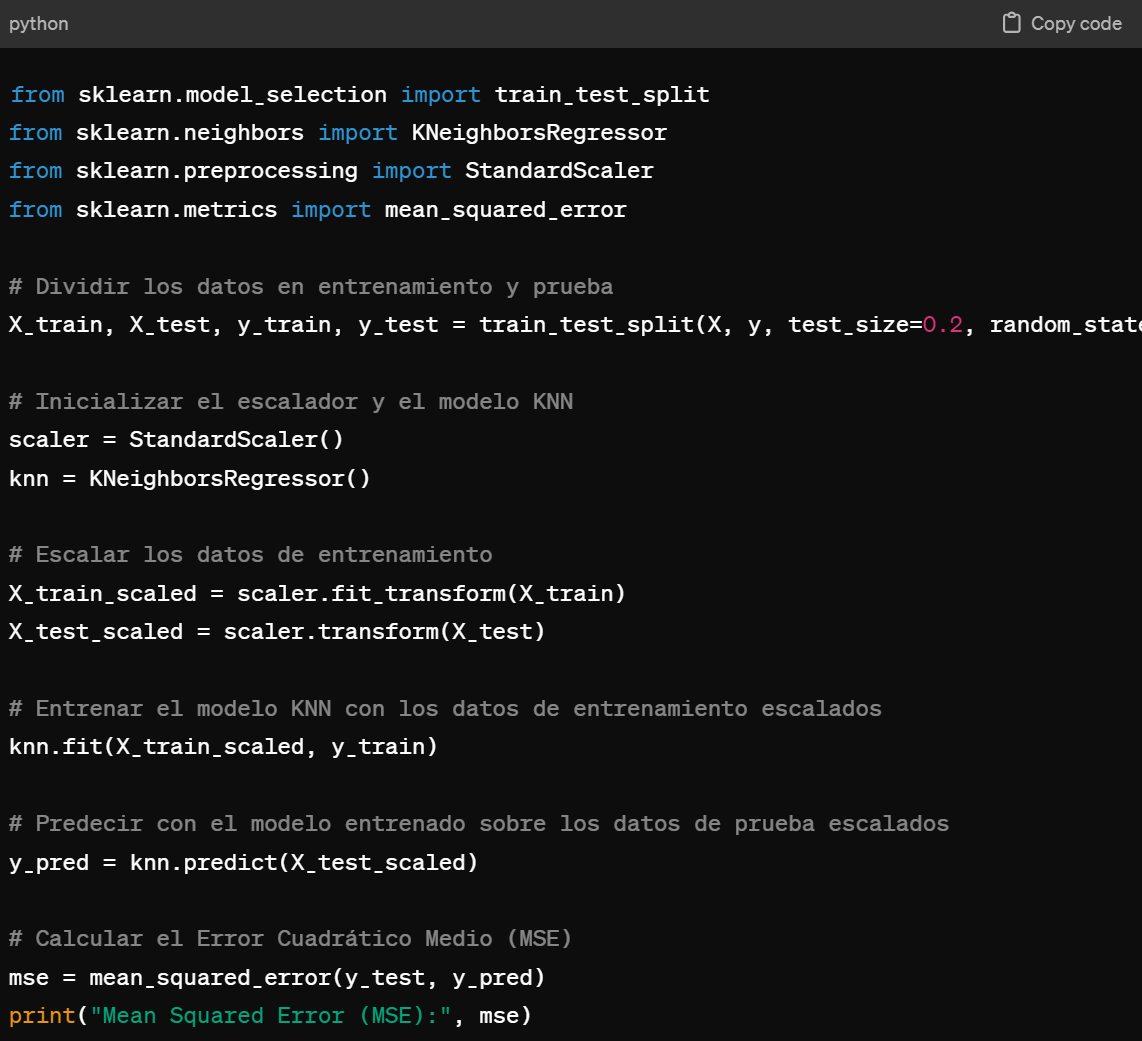

No obstante, este código tuvo que depurarse puesto que esta evaluación debía de hacerse con validación cruzada sobre particiones inner del conjunto de train outer. Otra cosa a tener en cuenta es el tamaño del conjunto de test en el split inicial que no es en porcentaje si no en número de instancias, como en la práctica ha podido observarse, entre otros aspectos.  
 
Por tanto, a la vista de este ejemplo se puede apreciar que ha sido una gran herramienta a lo largo de toda la práctica, puesto que al igual que este ejemplo existen otros muchos, y nos ha permitido centrarnos en las partes realmente interesantes que son el análisis de funcionamiento de los modelos, y su rendimiento a través del estudio de las métricas, ahorrándonos gran parte del trabajo tedioso de la implementación.